In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
import sys 
import os
import nibabel as nib
from nilearn import plotting
import glob
from nilearn.image import resample_to_img
from nilearn.masking import apply_mask
from nltools.data import Brain_Data
from nltools.mask import expand_mask, collapse_mask,roi_to_brain


/srv/conda/envs/notebook/lib/python3.7/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


In [2]:
save_dir = '/home/jovyan/paranoia_project/nh-paranoia/schaef_avg_events/'


In [3]:
paranoia_project/nh-paranoia/schaef_avg_events/events_per_roi_run1_HMM_avg_zscore.npy

paranoia_project/nh-paranoia/schaef_avg_events/event_per_roi_run1_HMM_avg_zscore.npy'


SyntaxError: EOL while scanning string literal (3259500746.py, line 3)

In [5]:
run = 3
num_events = np.load(save_dir + f'events_per_roi_run{run}_HMM_avg_zscore.npy',allow_pickle=True).item().values()


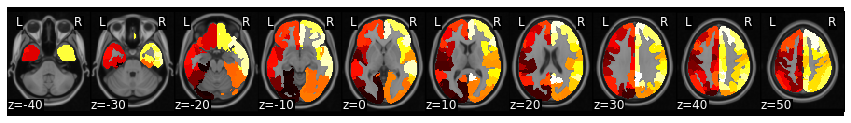

In [6]:
mask_dir = '/home/jovyan/paranoia_project/nh-paranoia/code/data/'
atlas_fname = (mask_dir + '_masks/'+ 'Schaefer2018_100Parcels_7Networks_order_FSLMNI152_2mm.nii.gz')

mask = Brain_Data(atlas_fname)
mask_x = expand_mask(mask)

mask.plot()

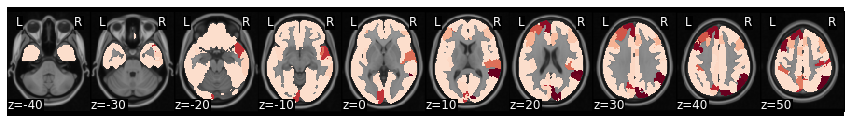

In [7]:
brain = roi_to_brain(pd.Series(list(num_events)), mask_x)
brain.plot(cmap='RdBu_r',vmax=np.max(list(num_events)))


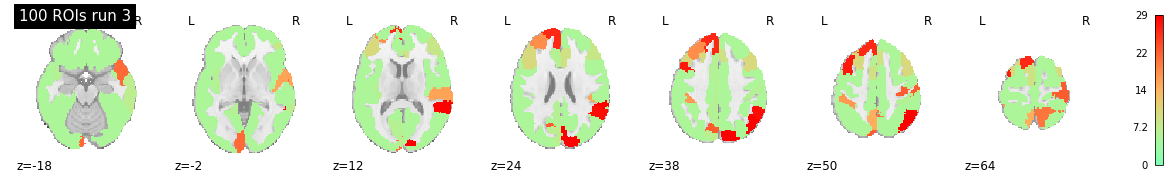

In [9]:
plotting.plot_stat_map(brain.to_nifti(), display_mode='z',cmap = 'rainbow',title=f'100 ROIs run {run}')

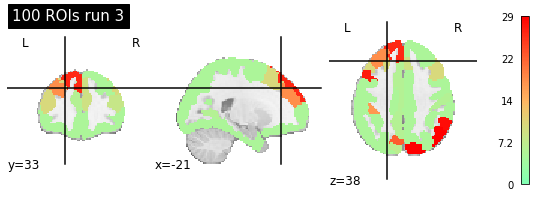

In [10]:
plotting.plot_stat_map(brain.to_nifti(), display_mode='ortho',cmap = 'rainbow',title=f'100 ROIs run {run}')


In [27]:
idx = list(num_events).index(np.max(list(num_events)))

In [36]:
list(num_events)[idx]

num_events_temp = np.load(save_dir + f'events_per_roi_run{run}_HMM_avg_zscore.npy',allow_pickle=True).item()
list(num_events_temp.keys())[idx]

'7Networks_RH_DorsAttn_Post_3'

## Add across runs

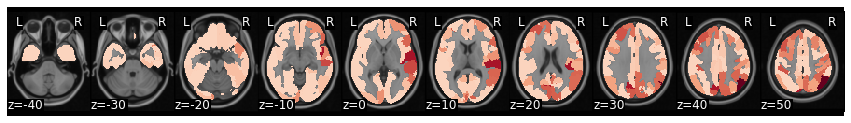

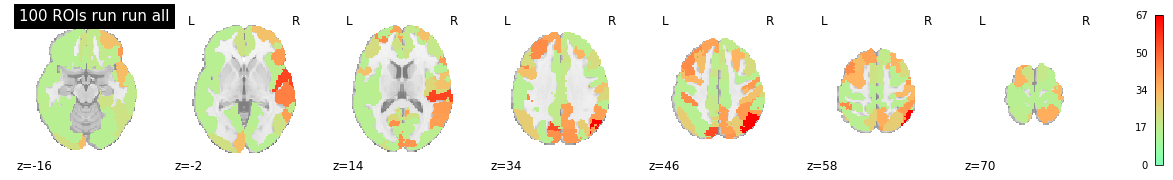

In [14]:
run=1
num_events_1 = np.load(save_dir + f'events_per_roi_run{run}_HMM_avg_zscore.npy',allow_pickle=True).item().values()
run=2
num_events_2 = np.load(save_dir + f'events_per_roi_run{run}_HMM_avg_zscore.npy',allow_pickle=True).item().values()
run=3
num_events_3 = np.load(save_dir + f'events_per_roi_run{run}_HMM_avg_zscore.npy',allow_pickle=True).item().values()

total_events = [sum(value) for value in zip(num_events_1, num_events_2, num_events_3)]
brain = roi_to_brain(pd.Series(list(total_events)), mask_x)
brain.plot(cmap='RdBu_r',vmax=np.max(list(total_events)))

run = 'run all'
plotting.plot_stat_map(brain.to_nifti(), display_mode='z',cmap = 'rainbow',title=f'100 ROIs run {run}')